# Access to the database

In [3]:
import pymysql.cursors

In [11]:
host = 'den1.mysql6.gear.host'
db = 'situation'
usr = 'situation'
psword = input()

# Connect to the database
connection = pymysql.connect(host=host, user=usr, password=psword, database=db, cursorclass=pymysql.cursors.DictCursor)

In [12]:
import pandas as pd

In [13]:
#UserId = 'SomeDeviceName'
sql_solubility = "SELECT * FROM b2_molecule_solubility"
sql_molecules = "SELECT * FROM b2_molecules"

with connection.cursor() as cursor:
   cursor.execute(sql_solubility)
   df_solubility = pd.DataFrame(data=cursor.fetchall(), index= None)

with connection.cursor() as cursor:
   cursor.execute(sql_molecules)
   df_molecules = pd.DataFrame(data=cursor.fetchall(), index= None)

In [14]:
df_solubility.head(10)

,id,molecule_name,smiles,solubility
0,1,Molecule1,C1=CC=CC=C1,1.59763
1,2,Molecule2,C2=CC=CC=C2,1.93038
2,3,Molecule3,C3=CC=CC=C3,1.70553
3,4,Molecule4,C4=CC=CC=C4,1.58977
4,5,Molecule5,C5=CC=CC=C5,1.34731
5,6,Molecule6,C6=CC=CC=C6,1.79179
6,7,Molecule7,C1=CC=CC=C1,1.37517
7,8,Molecule8,C2=CC=CC=C2,2.28355
8,9,Molecule9,C3=CC=CC=C3,2.42733
9,10,Molecule10,C4=CC=CC=C4,1.26688


In [15]:
df_molecules.head(10)

,MoleculeID,FkeyUser,MoleculeName,CanonicalSmileFormat,CasId,Formular,MOLFile
0,1,1,Acetaminophen,CC(=O)NC1=CC=C(C=C1)O,103-90-2,C8H9NO2,1983\n -OEChem-11082306173D\n\n 20 20 0 ...
1,2,1,Aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,50-78-2,C9H8O4,2244\n -OEChem-11082306153D\n\n 21 21 0 ...
2,3,1,Caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,58-08-2,C8H10N4O2,2519\n -OEChem-11082306213D\n\n 24 25 0 ...
3,4,1,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,15687-27-1,C13H18O2,3672\n -OEChem-12012304452D\n\n 33 33 0 ...
4,5,1,Butyl Acetate,CCCCOC(=O)C,123-86-4,C6H12O2,31272\n -OEChem-12012304452D\n\n 20 19 0 ...
5,6,1,Salicylic Acid,C1=CC=C(C(=C1)C(=O)O)O,69-72-7,C7H6O3,338\n -OEChem-12012304442D\n\n 16 16 0 0...
6,7,1,Ascorbic Acid,C(C(C1C(=C(C(=O)O1)O)O)O)O,50-81-7,C6H8O6,54670067\n -OEChem-12012304442D\n\n 20 20 0 ...
7,8,1,Lactic Acid,CC(C(=O)O)O,50-21-5,C3H6O3,612\n -OEChem-12012304432D\n\n 12 11 0 1...
8,9,1,D-Glucose,C(C1C(C(C(C(O1)O)O)O)O)O,50-99-7,C6H12O6,5793\n -OEChem-12012304432D\n\n 24 24 0 ...
9,10,1,Ethanol,CCO,64-17-5,C2H6O,702\n -OEChem-12012304422D\n\n 9 8 0 0...


In [19]:
df_molecules['MOLFile'][0]

'1983\n  -OEChem-11082306173D\n\n 20 20  0     0  0  0  0  0  0999 V2000\n    3.8509    0.4516    0.0012 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.5999    1.4041   -0.0018 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5705   -0.7171    0.0001 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.2066   -0.4231   -0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2205    0.9047    0.0004 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7298   -1.4570   -0.0007 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.5841    1.1986    0.0002 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.0933   -1.1629   -0.0007 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5204    0.1648   -0.0003 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.6485    0.1782    0.0009 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.9735   -0.5420    0.0010 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.4436    1.7577    0.0012 H   0  0  0  0  0  0  0  0  0  0  0  0\n    0.4113   -2.4963   -0.0010 H   0  0  0  0  0  0  0  0  0  0  0  0\n   

Summary Statistics for Solubility:
count    44.000000
mean      1.615564
std       0.554093
min       0.537580
25%       1.342812
50%       1.671200
75%       2.057497
max       2.457240
Name: solubility, dtype: float64


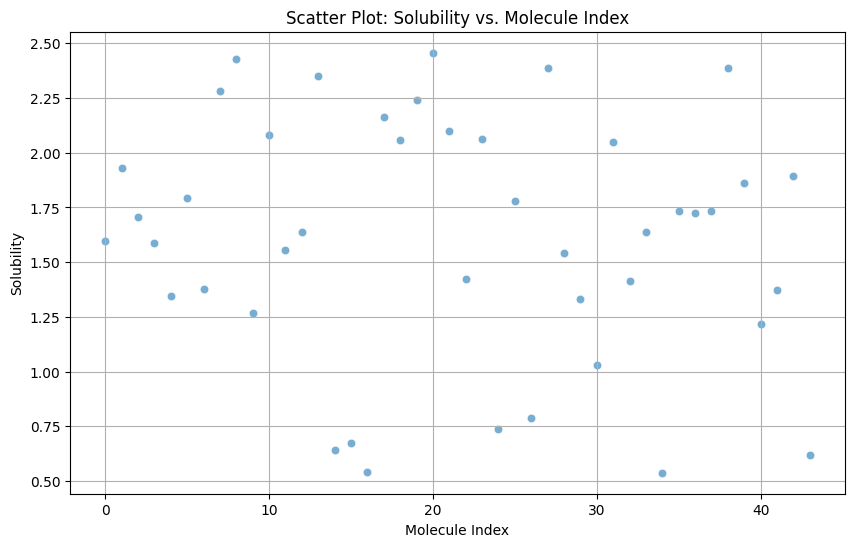

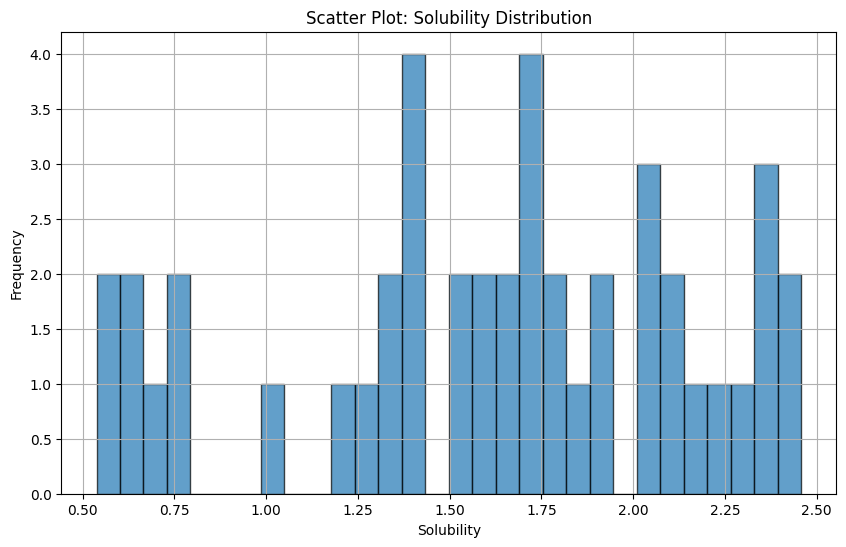

In [16]:
import matplotlib.pyplot as plt

# merge two dataset using MoleculeID
merged_df = pd.merge(df_molecules, df_solubility, left_on='MoleculeID', right_on='id')

# calculate Summary Statistics
summary_stats = merged_df['solubility'].describe()

# print Summary Statistics
print("Summary Statistics for Solubility:")
print(summary_stats)

# plot Scatter Plot: Solubility vs. Molecule Index
plt.figure(figsize=(10, 6))
plt.scatter(merged_df.index, merged_df['solubility'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot: Solubility vs. Molecule Index')
plt.xlabel('Molecule Index')
plt.ylabel('Solubility')
plt.grid(True)
plt.show()

# plot Scatter Plot: Solubility Distribution
plt.figure(figsize=(10, 6))
plt.hist(merged_df['solubility'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Scatter Plot: Solubility Distribution')
plt.xlabel('Solubility')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()